In [41]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [42]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [43]:
print ("Train dataframe shape is : ", train_df.shape)
print ("Test dataframe shape is : ", test_df.shape)

Train dataframe shape is :  (891, 12)
Test dataframe shape is :  (418, 11)


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [46]:
#'Cabin' variable is Null for most part of the rows. So it is better to remove the 'Cabin' variable for model building
train_df.drop(['Cabin'], axis=1, inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)

Text(0.5, 1.0, 'Distribution of Survival, (1 = Survived)')

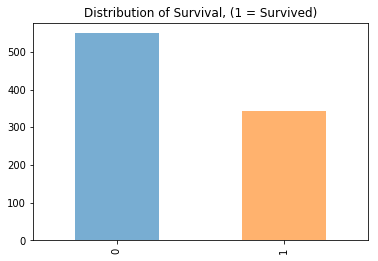

In [47]:
train_df.Survived.value_counts().plot(kind='bar', alpha=0.6)
plt.title("Distribution of Survival, (1 = Survived)")

Text(0.5, 1.0, 'Age Distribution')

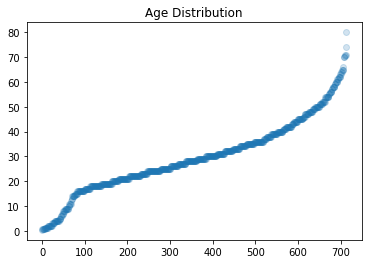

In [48]:
plt.scatter(range(train_df.shape[0]), np.sort(train_df.Age), alpha=0.2)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Port of Embarkation')

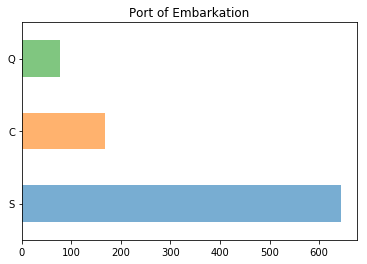

In [49]:
train_df.Embarked.value_counts().plot(kind="barh", alpha=0.6)
plt.title("Port of Embarkation")

Text(0.5, 1.0, 'Fare Distribution')

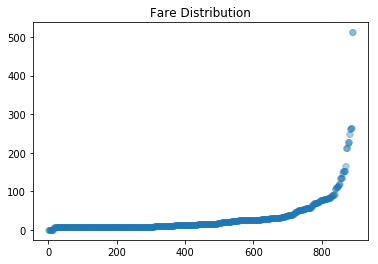

In [50]:
plt.scatter(range(train_df.shape[0]), np.sort(train_df.Fare), alpha=0.2)
plt.title("Fare Distribution")

Text(0.5, 1.0, 'Class Distribution')

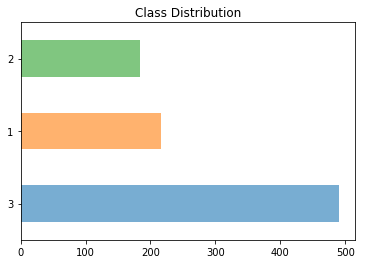

In [51]:
train_df.Pclass.value_counts().plot(kind="barh", alpha=0.6)
plt.title("Class Distribution")

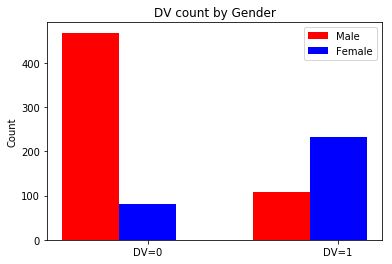

In [52]:
train_male = train_df.Survived[train_df.Sex == 'male'].value_counts().sort_index()
train_female = train_df.Survived[train_df.Sex == 'female'].value_counts().sort_index()

ind = np.arange(2)
width = 0.3
fig, ax = plt.subplots()
male = ax.bar(ind, np.array(train_male), width, color='r')
female = ax.bar(ind+width, np.array(train_female), width, color='b')
ax.set_ylabel('Count')
ax.set_title('DV count by Gender')
ax.set_xticks(ind + width)
ax.set_xticklabels(('DV=0', 'DV=1'))
ax.legend((male[0], female[0]), ('Male', 'Female'))
plt.show()

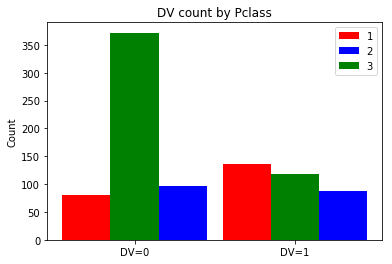

In [53]:
train_1 = train_df.Survived[train_df.Pclass == 1].value_counts().sort_index()
train_2 = train_df.Survived[train_df.Pclass == 2].value_counts().sort_index()
train_3 = train_df.Survived[train_df.Pclass == 3].value_counts().sort_index()
ind = np.arange(2)
width = 0.3
fig, ax = plt.subplots()
a1 = ax.bar(ind, np.array(train_1), width, color='r')
a2 = ax.bar(ind+(2*width), np.array(train_2), width, color='b')
a3 = ax.bar(ind+width, np.array(train_3), width, color='g')
ax.set_ylabel('Count')
ax.set_title('DV count by Pclass')
ax.set_xticks(ind + width)
ax.set_xticklabels(('DV=0', 'DV=1'))
ax.legend((a1[0], a2[0], a3[0]), ('1', '2', '3'))
plt.show()

In [54]:
a1=train_df['Age'].mean()
a2=test_df['Age'].mean()


In [55]:
train_df['Age'].fillna(a1, inplace = True)
test_df['Age'].fillna(a2, inplace = True)
train_df['Age'] = preprocessing.LabelEncoder().fit_transform(train_df['Age'].values)
test_df['Age'] = preprocessing.LabelEncoder().fit_transform(test_df['Age'].values)

In [56]:
# getting the necessary columns for building the model #
train_X = train_df[["Pclass", "SibSp", "Parch", "Age"]]
train_y = train_df["Survived"]
test_X = test_df[["Pclass", "SibSp", "Parch", "Age"]]

In [57]:
dev_X, val_X, dev_y, val_y = train_test_split(train_X, train_y, test_size=0.33, random_state=42)
clf = lm.LogisticRegression()
clf.fit(dev_X, dev_y)
val_preds1 = clf.predict(val_X)
print (val_preds1[:10])

[0 0 0 1 0 1 0 0 0 1]


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(val_y, val_preds1)

0.7322033898305085

In [63]:
val_preds = clf.predict(test_X.values)


In [64]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": val_preds
    })

submission.to_csv('submission.csv', index=False)

In [65]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
